Using device: cuda
Loading MNIST data...
Loading CIFAR-10 data...
Files already downloaded and verified
Visualizing raw MNIST data (PCA)...


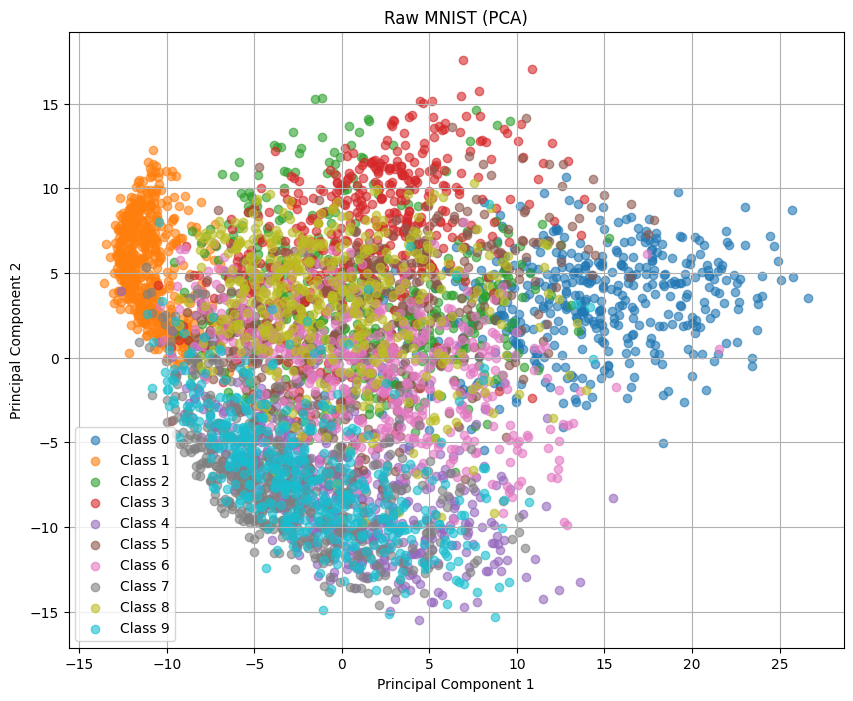

Visualizing raw CIFAR-10 data (PCA)...


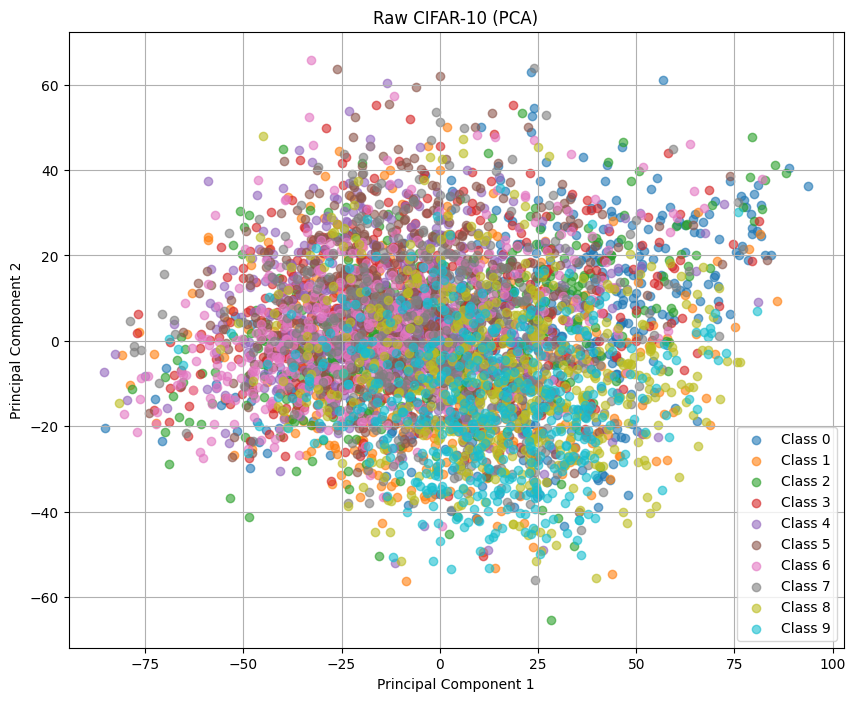


Training Contrastive Embedding for MNIST...
Starting training with contrastive loss for 50 epochs...
Epoch 1/50, Average Loss: 0.0653
Epoch 2/50, Average Loss: 0.0239
Epoch 3/50, Average Loss: 0.0164
Epoch 4/50, Average Loss: 0.0127
Epoch 5/50, Average Loss: 0.0101
Epoch 6/50, Average Loss: 0.0095
Epoch 7/50, Average Loss: 0.0100
Epoch 8/50, Average Loss: 0.0078
Epoch 9/50, Average Loss: 0.0073
Epoch 10/50, Average Loss: 0.0059
Epoch 11/50, Average Loss: 0.0059
Epoch 12/50, Average Loss: 0.0064
Epoch 13/50, Average Loss: 0.0052
Epoch 14/50, Average Loss: 0.0055
Epoch 15/50, Average Loss: 0.0046
Epoch 16/50, Average Loss: 0.0040
Epoch 17/50, Average Loss: 0.0036
Epoch 18/50, Average Loss: 0.0034
Epoch 19/50, Average Loss: 0.0039
Epoch 20/50, Average Loss: 0.0056
Epoch 21/50, Average Loss: 0.0057
Epoch 22/50, Average Loss: 0.0035
Epoch 23/50, Average Loss: 0.0044
Epoch 24/50, Average Loss: 0.0032
Epoch 25/50, Average Loss: 0.0048
Epoch 26/50, Average Loss: 0.0032
Epoch 27/50, Average Lo

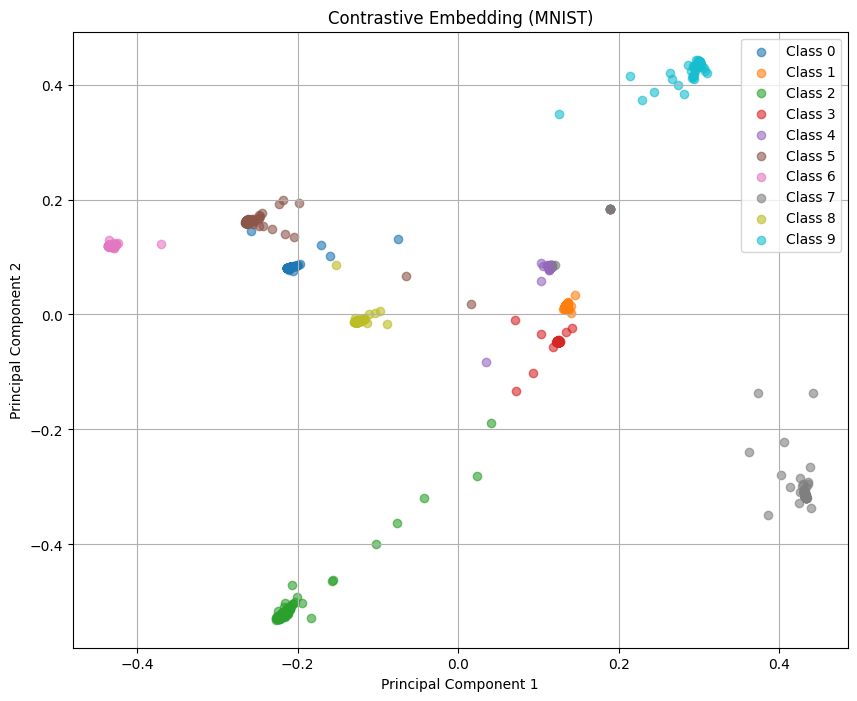


Training Contrastive Embedding for CIFAR-10...
Starting training with contrastive loss for 50 epochs...
Epoch 1/50, Average Loss: 0.2093
Epoch 2/50, Average Loss: 0.1846
Epoch 3/50, Average Loss: 0.1740
Epoch 4/50, Average Loss: 0.1656
Epoch 5/50, Average Loss: 0.1581
Epoch 6/50, Average Loss: 0.1516
Epoch 7/50, Average Loss: 0.1474
Epoch 8/50, Average Loss: 0.1417
Epoch 9/50, Average Loss: 0.1384
Epoch 10/50, Average Loss: 0.1339
Epoch 11/50, Average Loss: 0.1281
Epoch 12/50, Average Loss: 0.1240
Epoch 13/50, Average Loss: 0.1215
Epoch 14/50, Average Loss: 0.1168
Epoch 15/50, Average Loss: 0.1146
Epoch 16/50, Average Loss: 0.1110
Epoch 17/50, Average Loss: 0.1078
Epoch 18/50, Average Loss: 0.1027
Epoch 19/50, Average Loss: 0.1034
Epoch 20/50, Average Loss: 0.0991
Epoch 21/50, Average Loss: 0.0970
Epoch 22/50, Average Loss: 0.0957
Epoch 23/50, Average Loss: 0.0940
Epoch 24/50, Average Loss: 0.0897
Epoch 25/50, Average Loss: 0.0874
Epoch 26/50, Average Loss: 0.0859
Epoch 27/50, Average

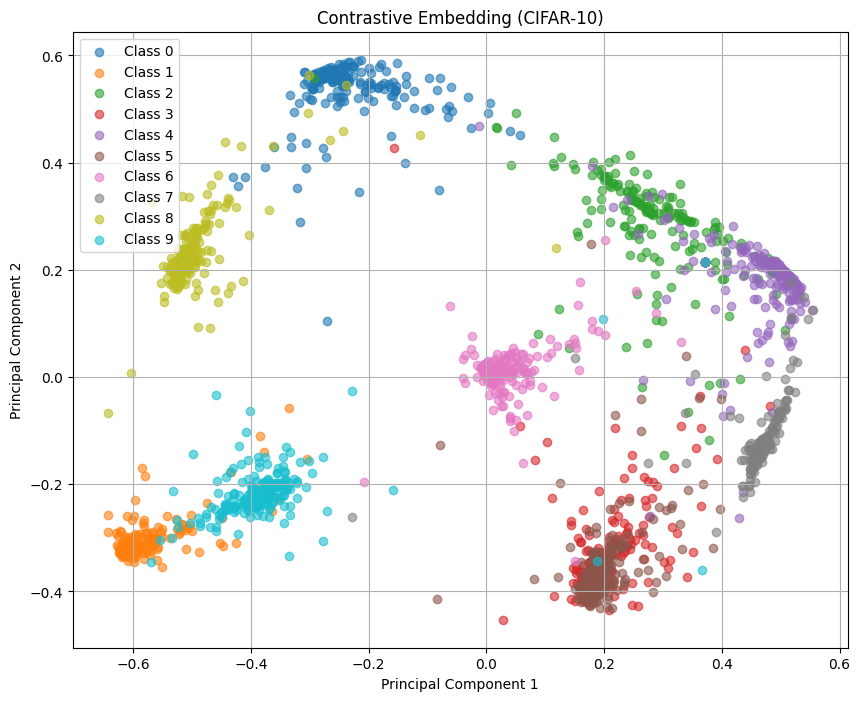


Training Triplet Embedding for MNIST...
Starting training with triplet loss for 50 epochs...
Epoch 1/50, Average Loss: 0.1163
Epoch 2/50, Average Loss: 0.0296
Epoch 3/50, Average Loss: 0.0220
Epoch 4/50, Average Loss: 0.0173
Epoch 5/50, Average Loss: 0.0143
Epoch 6/50, Average Loss: 0.0117
Epoch 7/50, Average Loss: 0.0110
Epoch 8/50, Average Loss: 0.0083
Epoch 9/50, Average Loss: 0.0083
Epoch 10/50, Average Loss: 0.0074
Epoch 11/50, Average Loss: 0.0068
Epoch 12/50, Average Loss: 0.0058
Epoch 13/50, Average Loss: 0.0058
Epoch 14/50, Average Loss: 0.0053
Epoch 15/50, Average Loss: 0.0045
Epoch 16/50, Average Loss: 0.0063
Epoch 17/50, Average Loss: 0.0035
Epoch 18/50, Average Loss: 0.0052
Epoch 19/50, Average Loss: 0.0041
Epoch 20/50, Average Loss: 0.0031
Epoch 21/50, Average Loss: 0.0033
Epoch 22/50, Average Loss: 0.0029
Epoch 23/50, Average Loss: 0.0043
Epoch 24/50, Average Loss: 0.0033
Epoch 25/50, Average Loss: 0.0034
Epoch 26/50, Average Loss: 0.0030
Epoch 27/50, Average Loss: 0.00

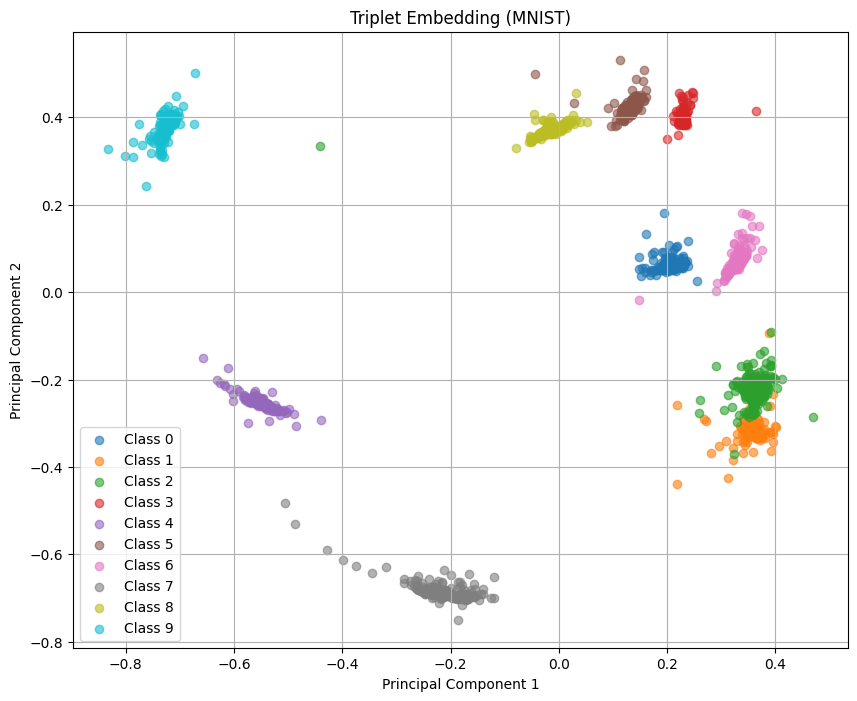


Training Triplet Embedding for CIFAR-10...
Starting training with triplet loss for 50 epochs...
Epoch 1/50, Average Loss: 0.6557
Epoch 2/50, Average Loss: 0.5611
Epoch 3/50, Average Loss: 0.5048
Epoch 4/50, Average Loss: 0.4697
Epoch 5/50, Average Loss: 0.4344
Epoch 6/50, Average Loss: 0.4097
Epoch 7/50, Average Loss: 0.3970
Epoch 8/50, Average Loss: 0.3761
Epoch 9/50, Average Loss: 0.3503
Epoch 10/50, Average Loss: 0.3402
Epoch 11/50, Average Loss: 0.3256
Epoch 12/50, Average Loss: 0.3046
Epoch 13/50, Average Loss: 0.2982
Epoch 14/50, Average Loss: 0.2853
Epoch 15/50, Average Loss: 0.2711
Epoch 16/50, Average Loss: 0.2638
Epoch 17/50, Average Loss: 0.2498
Epoch 18/50, Average Loss: 0.2388
Epoch 19/50, Average Loss: 0.2326
Epoch 20/50, Average Loss: 0.2266
Epoch 21/50, Average Loss: 0.2097
Epoch 22/50, Average Loss: 0.2054
Epoch 23/50, Average Loss: 0.1964
Epoch 24/50, Average Loss: 0.1920
Epoch 25/50, Average Loss: 0.1907
Epoch 26/50, Average Loss: 0.1810
Epoch 27/50, Average Loss: 0

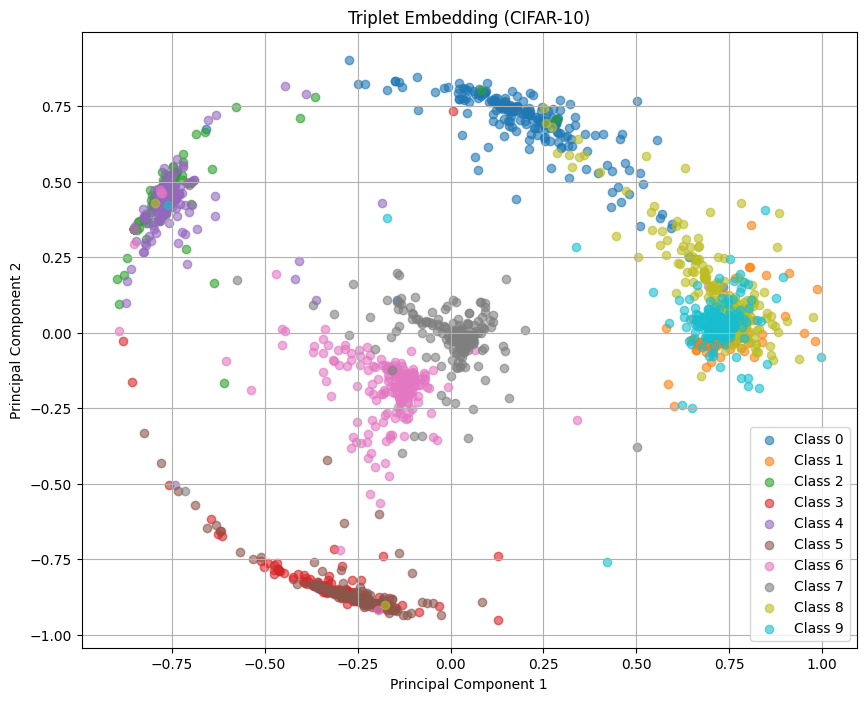


All tasks completed.


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# Set device globally
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------
# Visualization
# ----------------------
def visualize_data_pca(data, labels, title):
    """
    Performs PCA on the input data and visualizes the first two principal components.

    Args:
        data (torch.Tensor): The input data to visualize.
        labels (torch.Tensor): The corresponding labels for the data.
        title (str): The title of the plot.
    """
    data_np = data.cpu().numpy()
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_np)

    plt.figure(figsize=(10, 8))
    unique_labels = torch.unique(labels)
    for lab in unique_labels:
        idx = (labels == lab).cpu().numpy()
        plt.scatter(pca_result[idx, 0], pca_result[idx, 1], alpha=0.6, label=f'Class {lab.item()}')
    plt.legend()
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# ----------------------
# Load MNIST and CIFAR-10
# ----------------------
def load_mnist():
    """
    Loads and preprocesses the MNIST dataset.

    Returns:
        tuple: A tuple containing the data and labels as torch.Tensor.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    # Stack all images and labels into single tensors for easier access
    data = torch.stack([d[0] for d in dataset])  # [N, 1, 28, 28]
    labels = torch.tensor([d[1] for d in dataset])
    return data.to(device), labels.to(device)

def load_cifar10():
    """
    Loads and preprocesses the CIFAR-10 dataset.

    Returns:
        tuple: A tuple containing the data and labels as torch.Tensor.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    ])
    dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    # Stack all images and labels into single tensors for easier access
    data = torch.stack([d[0] for d in dataset])  # [N, 3, 32, 32]
    labels = torch.tensor([d[1] for d in dataset])
    return data.to(device), labels.to(device)

# ----------------------
# Convolutional Embedding Model
# ----------------------
class ConvNetEmbedder(nn.Module):
    """
    A convolutional neural network for learning embeddings.
    """
    def __init__(self, input_channels=3, input_height=32, input_width=32):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        # Compute correct flattened size using actual height & width
        with torch.no_grad():
            # Create a dummy tensor to pass through the feature extractor
            dummy = torch.zeros(1, input_channels, input_height, input_width)
            out = self.features(dummy)
            self.flattened_size = out.view(1, -1).size(1)

        self.fc = nn.Sequential(
            nn.Linear(self.flattened_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64), # Output embedding dimension is 64
        )

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor.

        Returns:
            torch.Tensor: The normalized embedding.
        """
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)
        return F.normalize(x, dim=-1) # L2 normalize the embeddings

# ----------------------
# Losses
# ----------------------
def contrastive_loss(x1, x2, label, margin=1.0):
    """
    Computes the contrastive loss.

    Args:
        x1 (torch.Tensor): Embedding of the first sample.
        x2 (torch.Tensor): Embedding of the second sample.
        label (torch.Tensor): Label indicating if the pair is similar (1) or dissimilar (0).
        margin (float): Margin for dissimilar pairs.

    Returns:
        torch.Tensor: The computed contrastive loss.
    """
    dist = F.pairwise_distance(x1, x2)
    # loss = label * dist^2 + (1 - label) * max(0, margin - dist)^2
    return (label * dist.pow(2) + (1 - label) * F.relu(margin - dist).pow(2)).mean()

def triplet_loss(anchor, pos, neg, margin=1.0):
    """
    Computes the triplet loss.

    Args:
        anchor (torch.Tensor): Embedding of the anchor sample.
        pos (torch.Tensor): Embedding of the positive sample.
        neg (torch.Tensor): Embedding of the negative sample.
        margin (float): Margin for the triplet loss.

    Returns:
        torch.Tensor: The computed triplet loss.
    """
    d_pos = F.pairwise_distance(anchor, pos)
    d_neg = F.pairwise_distance(anchor, neg)
    # loss = max(0, d_pos - d_neg + margin)
    return F.relu(d_pos - d_neg + margin).mean()

# ----------------------
# Training Loop
# ----------------------
def train_embedding_model(data, labels, loss_type='triplet', epochs=50, batch_size=256):
    """
    Trains the embedding model using either contrastive or triplet loss.

    Args:
        data (torch.Tensor): The input data.
        labels (torch.Tensor): The corresponding labels.
        loss_type (str): Type of loss to use ('triplet' or 'contrastive').
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.

    Returns:
        nn.Module: The trained embedding model in evaluation mode.
    """
    channels, height, width = data.size(1), data.size(2), data.size(3)
    # Fix: Pass input_height and input_width explicitly
    model = ConvNetEmbedder(input_channels=channels, input_height=height, input_width=width).to(device).train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    n = len(data)

    print(f"Starting training with {loss_type} loss for {epochs} epochs...")
    for epoch in range(epochs):
        perm = torch.randperm(n)
        total_loss = 0.0
        num_batches = 0
        for i in range(0, n, batch_size):
            batch_idx = perm[i:i + batch_size]
            x_batch, y_batch = data[batch_idx], labels[batch_idx]
            
            # Ensure the model is in training mode during this loop
            model.train() 
            x_embed = model(x_batch)

            optimizer.zero_grad()
            current_loss = torch.tensor(0.0).to(device) # Initialize current_loss for the batch

            if loss_type == 'triplet':
                anchors, positives, negatives = [], [], []
                # Collect triplets within the current batch
                for j in range(len(x_batch)):
                    anchor_label = y_batch[j].item()
                    
                    # Find potential positive samples within the batch
                    pos_candidates_in_batch = (y_batch == anchor_label).nonzero(as_tuple=True)[0]
                    # Exclude the anchor itself
                    pos_candidates_in_batch = pos_candidates_in_batch[pos_candidates_in_batch != j]

                    # Find potential negative samples within the batch
                    neg_candidates_in_batch = (y_batch != anchor_label).nonzero(as_tuple=True)[0]

                    if len(pos_candidates_in_batch) > 0 and len(neg_candidates_in_batch) > 0:
                        pos_j = random.choice(pos_candidates_in_batch).item()
                        neg_j = random.choice(neg_candidates_in_batch).item()

                        anchors.append(x_embed[j])
                        positives.append(x_embed[pos_j])
                        negatives.append(x_embed[neg_j])
                
                if anchors:
                    current_loss = triplet_loss(torch.stack(anchors), torch.stack(positives), torch.stack(negatives))
                else:
                    # If no valid triplets found in batch, skip this batch for loss calculation
                    continue

            elif loss_type == 'contrastive':
                a, b, l = [], [], []
                for j in range(len(x_batch)):
                    current_label = y_batch[j].item()
                    
                    # 50% chance for positive pair, 50% for negative
                    if random.random() < 0.5: # Positive pair
                        pos_candidates_in_batch = (y_batch == current_label).nonzero(as_tuple=True)[0]
                        pos_candidates_in_batch = pos_candidates_in_batch[pos_candidates_in_batch != j]
                        if len(pos_candidates_in_batch) > 0:
                            k = random.choice(pos_candidates_in_batch).item()
                            a.append(x_embed[j])
                            b.append(x_embed[k])
                            l.append(1.0)
                    else: # Negative pair
                        neg_candidates_in_batch = (y_batch != current_label).nonzero(as_tuple=True)[0]
                        if len(neg_candidates_in_batch) > 0:
                            k = random.choice(neg_candidates_in_batch).item()
                            a.append(x_embed[j])
                            b.append(x_embed[k])
                            l.append(0.0)
                
                if a: # If pairs were generated
                    current_loss = contrastive_loss(torch.stack(a), torch.stack(b), torch.tensor(l).to(device))
                else:
                    # If no valid pairs found in batch, skip this batch for loss calculation
                    continue
            
            if current_loss > 0: # Only backpropagate if there's an actual loss
                current_loss.backward()
                optimizer.step()
                total_loss += current_loss.item()
                num_batches += 1
        
        avg_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss:.4f}")

    return model.eval() # Return model in evaluation mode

# ----------------------
# Full Pipeline
# ----------------------
print(f"Using device: {device}")

# Load datasets
print("Loading MNIST data...")
data1, labels1 = load_mnist()
print("Loading CIFAR-10 data...")
data2, labels2 = load_cifar10()

# PCA visualization on raw input
print("Visualizing raw MNIST data (PCA)...")
visualize_data_pca(data1.view(len(data1), -1)[:5000], labels1[:5000], "Raw MNIST (PCA)")
print("Visualizing raw CIFAR-10 data (PCA)...")
visualize_data_pca(data2.view(len(data2), -1)[:5000], labels2[:5000], "Raw CIFAR-10 (PCA)")

# Contrastive training and visualization
print("\nTraining Contrastive Embedding for MNIST...")
model_con1 = train_embedding_model(data1, labels1, loss_type='contrastive')
print("Extracting Contrastive embeddings for MNIST...")
# Process in batches to avoid OOM for large datasets
data_c1_list = []
with torch.no_grad():
    for i in range(0, len(data1), 256): # Use a reasonable batch size for inference
        batch_data = data1[i:i+256]
        data_c1_list.append(model_con1(batch_data).detach().cpu())
data_c1 = torch.cat(data_c1_list).to(device) # Move back to device if needed later
visualize_data_pca(data_c1[:2000], labels1[:2000], "Contrastive Embedding (MNIST)")

print("\nTraining Contrastive Embedding for CIFAR-10...")
model_con2 = train_embedding_model(data2, labels2, loss_type='contrastive')
print("Extracting Contrastive embeddings for CIFAR-10...")
data_c2_list = []
with torch.no_grad():
    for i in range(0, len(data2), 256):
        batch_data = data2[i:i+256]
        data_c2_list.append(model_con2(batch_data).detach().cpu())
data_c2 = torch.cat(data_c2_list).to(device)
visualize_data_pca(data_c2[:2000], labels2[:2000], "Contrastive Embedding (CIFAR-10)")


# Triplet training and visualization
print("\nTraining Triplet Embedding for MNIST...")
model_tri1 = train_embedding_model(data1, labels1, loss_type='triplet')
print("Extracting Triplet embeddings for MNIST...")
data_t1_list = []
with torch.no_grad():
    for i in range(0, len(data1), 256):
        batch_data = data1[i:i+256]
        data_t1_list.append(model_tri1(batch_data).detach().cpu())
data_t1 = torch.cat(data_t1_list).to(device)
visualize_data_pca(data_t1[:2000], labels1[:2000], "Triplet Embedding (MNIST)")

print("\nTraining Triplet Embedding for CIFAR-10...")
model_tri2 = train_embedding_model(data2, labels2, loss_type='triplet')
print("Extracting Triplet embeddings for CIFAR-10...")
data_t2_list = []
with torch.no_grad():
    for i in range(0, len(data2), 256):
        batch_data = data2[i:i+256]
        data_t2_list.append(model_tri2(batch_data).detach().cpu())
data_t2 = torch.cat(data_t2_list).to(device)
visualize_data_pca(data_t2[:2000], labels2[:2000], "Triplet Embedding (CIFAR-10)")

print("\nAll tasks completed.")


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------
# Visualization
# ----------------------
def visualize_data_pca(data, labels, title):
    data_np = data.cpu().numpy()
    pca = PCA(n_components=2)
    tpca_result = pca.fit_transform(data_np)

    plt.figure(figsize=(10, 8))
    unique_labels = torch.unique(labels)
    for lab in unique_labels:
        idx = (labels == lab).cpu().numpy()
        plt.scatter(tpca_result[idx, 0], tpca_result[idx, 1], alpha=0.6, label=f'Class {lab.item()}')
    plt.legend()
    plt.title(title)
    plt.show()

# ----------------------
# Load MNIST and CIFAR-10
# ----------------------
def load_mnist():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    data = torch.stack([d[0] for d in dataset])  # [N, 1, 28, 28]
    labels = torch.tensor([d[1] for d in dataset])
    return data.to(device), labels.to(device)

def load_cifar10():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    ])
    dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    data = torch.stack([d[0] for d in dataset])  # [N, 3, 32, 32]
    labels = torch.tensor([d[1] for d in dataset])
    return data.to(device), labels.to(device)

# ----------------------
# Model & Losses
# ----------------------
class SimpleMLP(nn.Module):
    def __init__(self, input_dim=784, embed_dim=32):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, embed_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return F.normalize(self.fc2(x), dim=-1)

def contrastive_loss(x1, x2, label, margin=1.0):
    dist = F.pairwise_distance(x1, x2)
    return (label * dist.pow(2) + (1 - label) * F.relu(margin - dist).pow(2)).mean()

def triplet_loss(anchor, pos, neg, margin=1.0):
    d_pos = F.pairwise_distance(anchor, pos)
    d_neg = F.pairwise_distance(anchor, neg)
    return F.relu(d_pos - d_neg + margin).mean()

# ----------------------
# Training Loop
# ----------------------
def train_embedding_model(data, labels, loss_type='triplet', epochs=5, batch_size=128):
    channels, height = data.size(1), data.size(2)
    model = ConvNetEmbedder(input_channels=channels, input_size=height).to(device).train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    n = len(data)

    for epoch in range(epochs):
        perm = torch.randperm(n)
        for i in range(0, n, batch_size):
            batch_idx = perm[i:i + batch_size]
            x_batch, y_batch = data[batch_idx], labels[batch_idx]
            x_embed = model(x_batch)

            optimizer.zero_grad()
            if loss_type == 'triplet':
                anchors, positives, negatives = [], [], []
                for j in range(len(x_batch)):
                    label = y_batch[j].item()
                    pos_idx = (labels == label).nonzero(as_tuple=True)[0]
                    neg_idx = (labels != label).nonzero(as_tuple=True)[0]
                    if len(pos_idx) < 2: continue

                    anchors.append(x_embed[j])
                    positives.append(model(data[random.choice(pos_idx)]))
                    negatives.append(model(data[random.choice(neg_idx)]))

                if anchors:
                    loss = triplet_loss(torch.stack(anchors), torch.stack(positives), torch.stack(negatives))
                    loss.backward()
                    optimizer.step()

            elif loss_type == 'contrastive':
                a, b, l = [], [], []
                for j in range(len(x_batch)):
                    label = y_batch[j].item()
                    if random.random() < 0.5:
                        pos_idx = (labels == label).nonzero(as_tuple=True)[0]
                        if len(pos_idx) < 2: continue
                        k = random.choice(pos_idx)
                        a.append(x_embed[j])
                        b.append(model(data[k]))
                        l.append(1.0)
                    else:
                        neg_idx = (labels != label).nonzero(as_tuple=True)[0]
                        k = random.choice(neg_idx)
                        a.append(x_embed[j])
                        b.append(model(data[k]))
                        l.append(0.0)

                if a:
                    loss = contrastive_loss(torch.stack(a), torch.stack(b), torch.tensor(l).to(device))
                    loss.backward()
                    optimizer.step()

    return model.eval()

# ----------------------
# Full Pipeline
# ----------------------
data1, labels1 = load_mnist()
data2, labels2 = load_cifar10()

# PCA visualization on raw input
visualize_data_pca(data1.view(len(data1), -1)[:2000], labels1[:2000], "Raw MNIST (PCA)")
visualize_data_pca(data2.view(len(data2), -1)[:2000], labels2[:2000], "Raw CIFAR-10 (PCA)")

# Contrastive
model_con1 = train_embedding_model(data1, labels1, loss_type='contrastive')
model_con2 = train_embedding_model(data2, labels2, loss_type='contrastive')
data_c1 = model_con1(data1).detach()
data_c2 = model_con2(data2).detach()
visualize_data_pca(data_c1[:2000], labels1[:2000], "Contrastive Embedding (MNIST)")
visualize_data_pca(data_c2[:2000], labels2[:2000], "Contrastive Embedding (CIFAR-10)")

# Triplet
model_tri1 = train_embedding_model(data1, labels1, loss_type='triplet')
model_tri2 = train_embedding_model(data2, labels2, loss_type='triplet')
data_t1 = model_tri1(data1).detach()
data_t2 = model_tri2(data2).detach()
visualize_data_pca(data_t1[:2000], labels1[:2000], "Triplet Embedding (MNIST)")
visualize_data_pca(data_t2[:2000], labels2[:2000], "Triplet Embedding (CIFAR-10)")



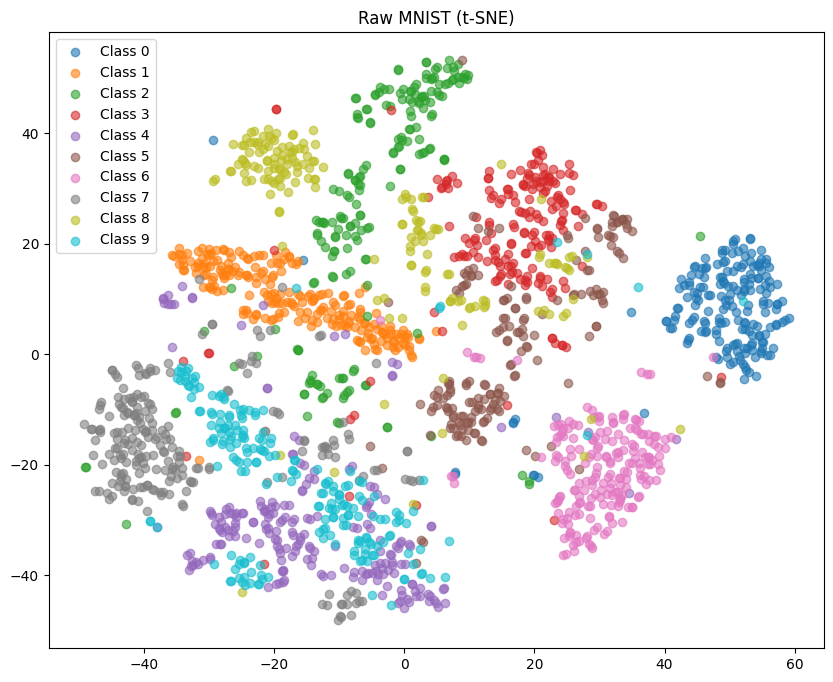

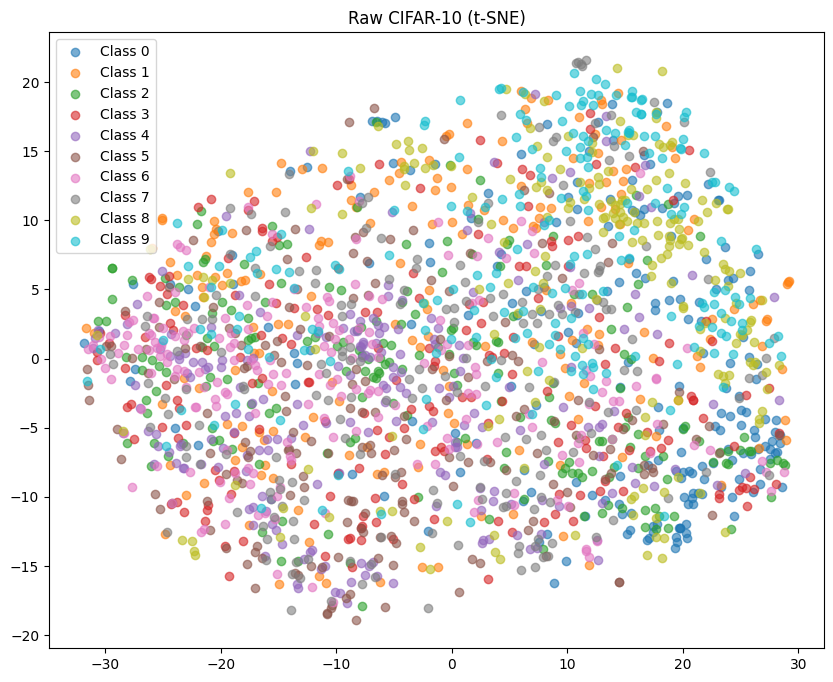

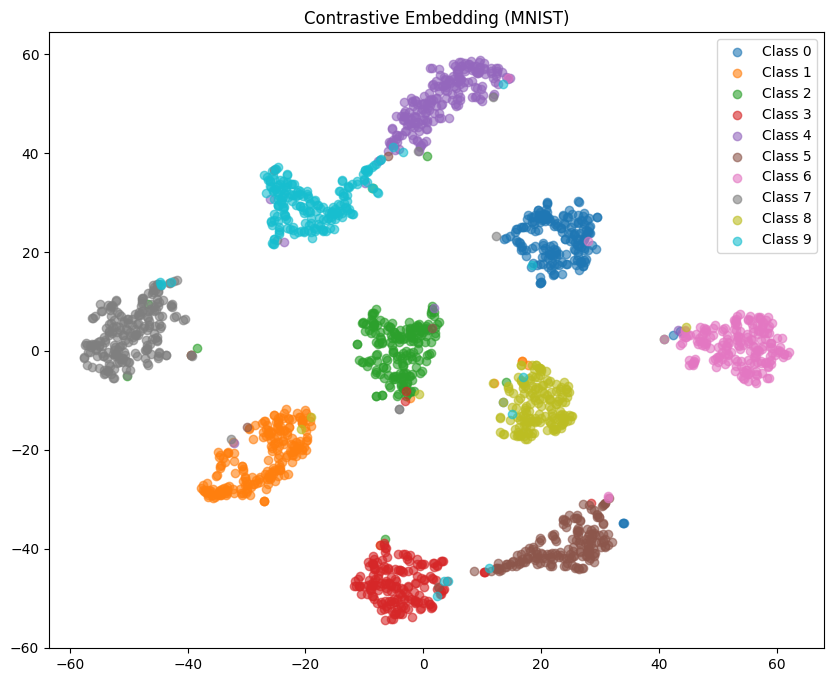

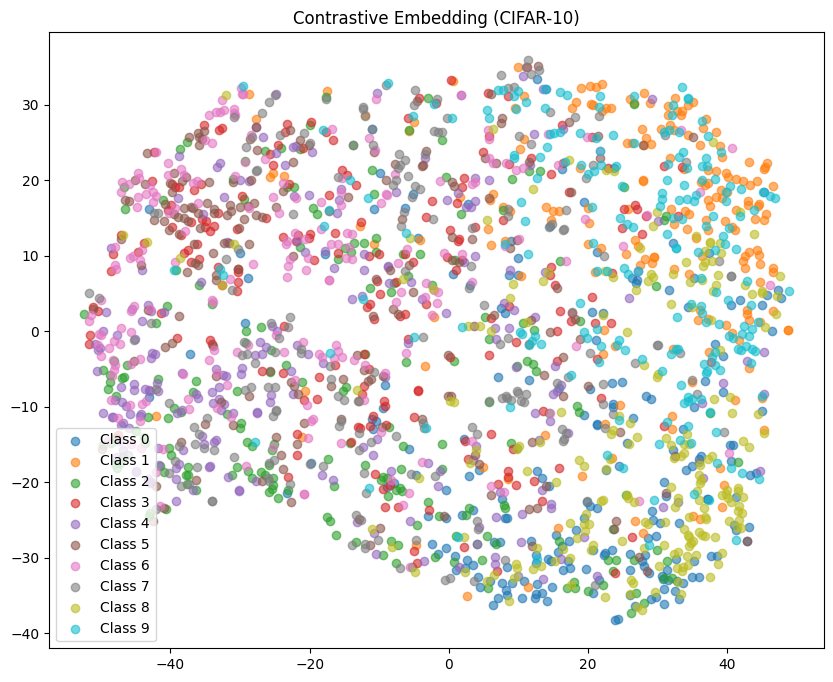

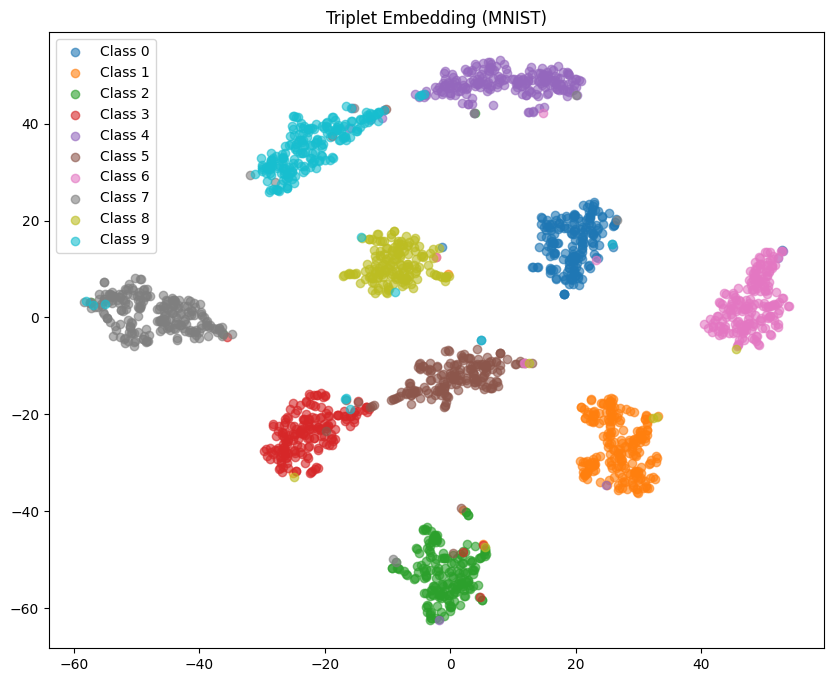

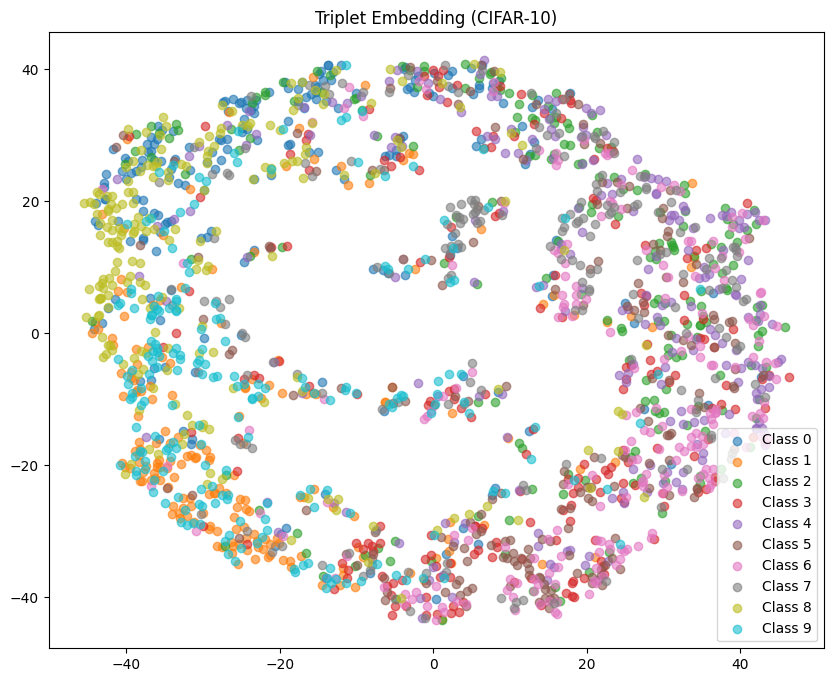

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

import numpy as np

class SimpleMLP(nn.Module):
    def __init__(self, input_dim=784, embed_dim=32):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, embed_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return F.normalize(self.fc2(x), dim=-1)


def visualize_data_tsne(data, labels, title):
    data_np = data.cpu().numpy()
    labels_np = labels.cpu().numpy()

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    tsne_result = tsne.fit_transform(data_np)

    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels_np)
    for lab in unique_labels:
        idx = labels_np == lab
        if lab == -1:
            plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], c='k', alpha=0.3, label='Outliers', marker='x')
        else:
            plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], alpha=0.6, label=f'Class {lab}')
    plt.legend()
    plt.title(title)
    plt.show()

    
visualize_data_tsne(data1.view(len(data1), -1)[:2000], labels1[:2000], "Raw MNIST (t-SNE)")
visualize_data_tsne(data2.view(len(data2), -1)[:2000], labels2[:2000], "Raw CIFAR-10 (t-SNE)")

visualize_data_tsne(data_c1[:2000], labels1[:2000], "Contrastive Embedding (MNIST)")
visualize_data_tsne(data_c2[:2000], labels2[:2000], "Contrastive Embedding (CIFAR-10)")

visualize_data_tsne(data_t1[:2000], labels1[:2000], "Triplet Embedding (MNIST)")
visualize_data_tsne(data_t2[:2000], labels2[:2000], "Triplet Embedding (CIFAR-10)")
